# Telco Customer Churn
## by Khalid Salah Amer

## Preliminary Wrangling

> The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.<br>
The data set includes information about:
    <ul>
    <li>Customers who left within the last month – the column is called Churn</li>
    <li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</li>
    <li>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
    <li>Demographic info about customers – gender, age range, and if they have partners and dependents</li>
    </ul>
Data Source:https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

## Data
**Demographics**
<ul>
<li>CustomerID: A unique ID that identifies each customer.</li>

<li>Gender: The customer’s gender: Male, Female</li>

<li>Senior Citizen: Indicates if the customer is 65 or older: Yes, No<</li>

<li>Partner: Indicates if the customer is married: Yes, No</li>

<li>Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.</li>
</ul>

**Services**
<ul>
<li>Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.</li>

<li>Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No</li>

<li>Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No</li>

<li>Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.</li>

<li>Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No</li>

<li>Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No</li>

<li>Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet 
equipment provided by the company: Yes, No</li>

<li>Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No</li>

<li>Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.</li>

<li>Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.</li>

<li>Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.</li>

<li>Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No</li>

<li>Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check</li>

<li>Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.</li>

<li>Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.</li>
</ul>

**Status**
<ul>
<li>Churn : Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.</li>
    </ul>

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.loc[df["TotalCharges"]==" ","TotalCharges"] = 0
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")
df["TotalCharges"].describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

In [7]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'Young',1:'Old'})

### What is the structure of your dataset?

> There are 7043 rows and 21 columns

### What is/are the main feature(s) of interest in your dataset?

> Churn

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> SeniorCitizen, Partner, tenure, contract, and total charge.

## Univariate Exploration

In [8]:
b_color = sns.color_palette()[0]

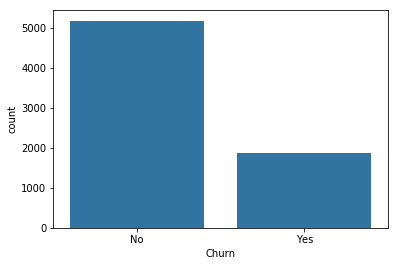

In [9]:
sns.countplot(data=df, x = 'Churn',color=b_color);

In [10]:
churn_ratio = np.round(sum(df.Churn == 'Yes')/df.Churn.shape[0],2)
print('Ratio of Churn Customers is {}'.format(churn_ratio))

Ratio of Churn Customers is 0.27


Number of Customers who `left` the company `is high`, We need to investigate into the dataset to discover the reasons

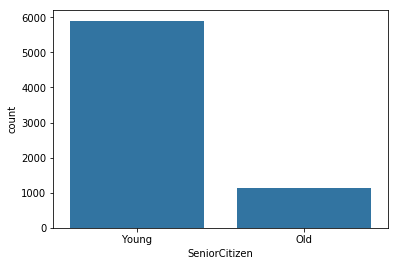

In [11]:
sns.countplot(data=df, x = 'SeniorCitizen',color=b_color);

Most of the Customers are `less than 65` years old.

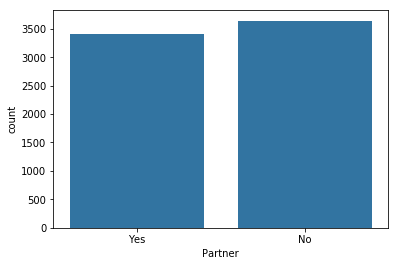

In [12]:
sns.countplot(data=df, x = 'Partner',color=b_color);

The number of `married` Customers `equals` the unmarried, this may help us to discover who has a large number of churn

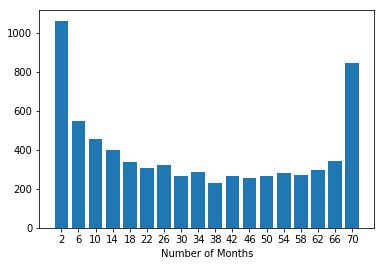

In [13]:
bin_edges = np.arange(0, df.tenure.max()+4, 4)

plt.hist(data=df, x = 'tenure',bins=bin_edges,rwidth = 0.8)
plt.xticks(np.arange(0+2, df.tenure.max(), 4))
plt.xlabel('Number of Months');

The Company has a large number of `new customers`.

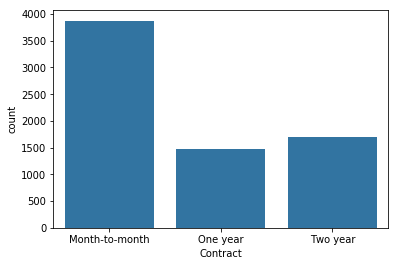

In [14]:
sns.countplot(data=df, x = 'Contract',color=b_color);

Most of customers are using `Month to Month` contract.

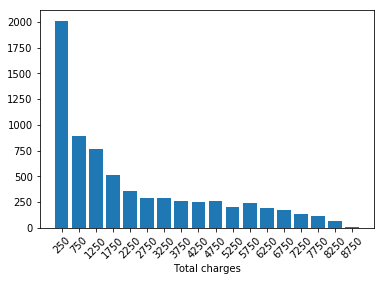

In [15]:
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)

plt.hist(data=df, x = 'TotalCharges'
         ,bins=bin_edges
         ,rwidth = 0.8)
plt.xticks(np.arange(0+250, df.TotalCharges.max()+500, 500),rotation=45)
plt.xlabel('Total charges');

Data is `Right skewed`, we will check if their is a correlation between amount of charge and churn

### Check other features

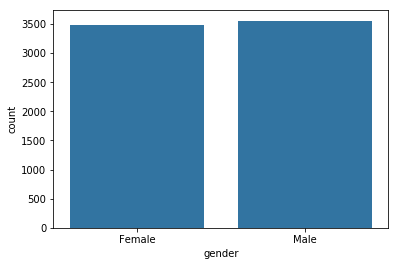

In [16]:
sns.countplot(data=df, x = 'gender',color=b_color);

Number of `Female` `equals` the Number of `Male`, this may help us to discover who has a large number of churn

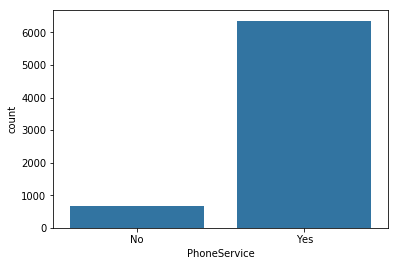

In [17]:
sns.countplot(data=df, x = 'PhoneService',color=b_color);

`Small` number of Customers who have `not a phone service`, Maybe those who tend to churn

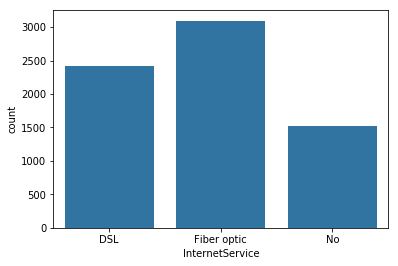

In [18]:
sns.countplot(data=df, x = 'InternetService',color=b_color);

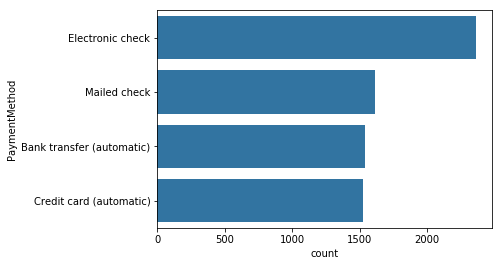

In [19]:
sns.countplot(data=df, y = 'PaymentMethod',color=b_color);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Ratio of Churn Customers is 0.27

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Total charge is Right skewed and this is expected.

## Bivariate Exploration

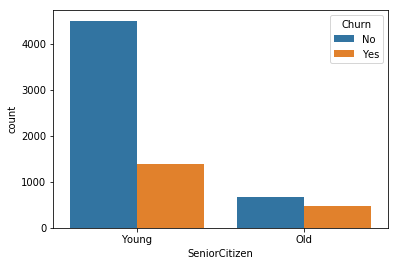

In [20]:
sns.countplot(data=df, x = 'SeniorCitizen',hue='Churn');

In [21]:
group = df.groupby('SeniorCitizen')
np.round(100*group['Churn'].value_counts()/group.size())

SeniorCitizen  Churn
Old            No       58.0
               Yes      42.0
Young          No       76.0
               Yes      24.0
dtype: float64

`42%` of Customers who are **65 or older**  churned, Maybe some of them was dead :( .

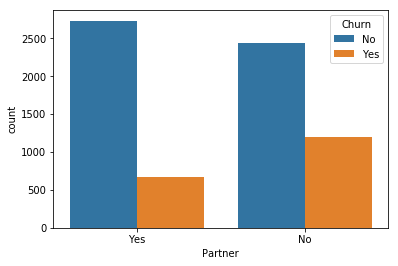

In [22]:
sns.countplot(data=df, x = 'Partner',hue='Churn');

The porportion of customers churned who **have partner** is `less` than who **have not**.

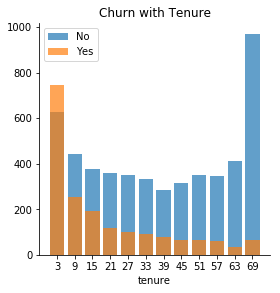

In [23]:
g = sns.FacetGrid(data=df,hue='Churn',height=4)
bin_edges = np.arange(0, df.tenure.max()+6, 6)
g.map(plt.hist,'tenure',bins=bin_edges,rwidth = 0.8,alpha=0.7)
plt.xticks(np.arange(0+3, df.tenure.max(), 6))
plt.legend()
plt.title('Churn with Tenure');

The `more months` the customer with the company the `less` he churns.

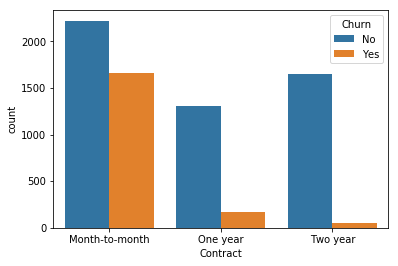

In [24]:
sns.countplot(data=df, x = 'Contract',hue='Churn');

In [25]:
group = df.groupby('Contract')
round(group['Churn'].value_counts()/group.size(),2)

Contract        Churn
Month-to-month  No       0.57
                Yes      0.43
One year        No       0.89
                Yes      0.11
Two year        No       0.97
                Yes      0.03
dtype: float64

The `more` amount of contract the `less` the customer churns.<br>
**Month-to-month** near the `43%` of them churn, but with **two years** of contract just `3%` of them churn.

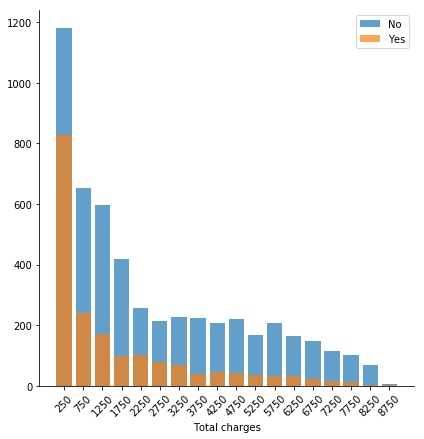

In [26]:
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g = sns.FacetGrid(data=df,hue='Churn',height=6)
g.map(plt.hist,'TotalCharges'
         ,bins=bin_edges
         ,rwidth = 0.8
         ,alpha=0.7)
plt.xticks(np.arange(0+250, df.TotalCharges.max()+500, 500),rotation=45)
plt.xlabel('Total charges');
plt.legend();

The `more Charges` the customer has the `less` he churns.

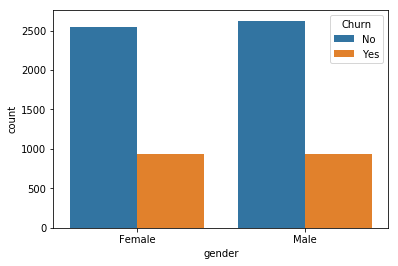

In [27]:
sns.countplot(data=df, x = 'gender',hue='Churn');

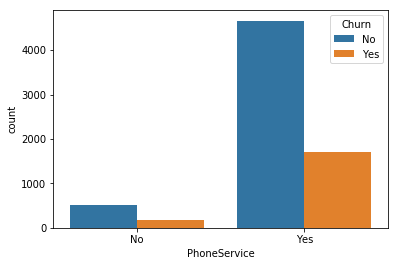

In [28]:
sns.countplot(data=df, x = 'PhoneService',hue='Churn');

In [29]:
group = df.groupby('PhoneService')
np.round(100*group['Churn'].value_counts()/group.size())

PhoneService  Churn
No            No       75.0
              Yes      25.0
Yes           No       73.0
              Yes      27.0
dtype: float64

The porpotion of `leaving a company` if a customer **has a phone service** is `large` than if he **hasn't**.

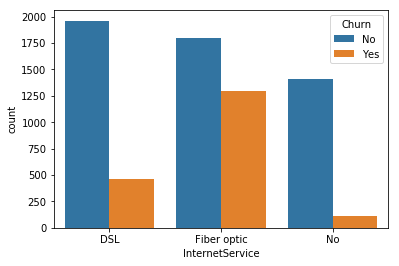

In [30]:
sns.countplot(data=df, x = 'InternetService',hue='Churn');

In [31]:
group = df.groupby('InternetService')
round(group['Churn'].value_counts()/group.size(),2)

InternetService  Churn
DSL              No       0.81
                 Yes      0.19
Fiber optic      No       0.58
                 Yes      0.42
No               No       0.93
                 Yes      0.07
dtype: float64

`42%` of Customers who have **Fiber optic** as internet service churned, Maybe their is a problem with this service.

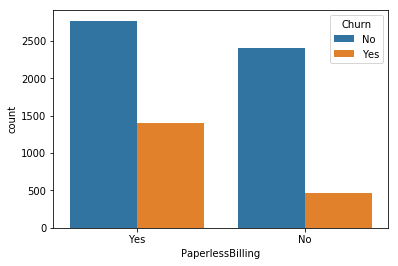

In [32]:
sns.countplot(data=df, x = 'PaperlessBilling',hue='Churn');

In [33]:
group = df.groupby('PaperlessBilling')
round(group['Churn'].value_counts()/group.size(),2)

PaperlessBilling  Churn
No                No       0.84
                  Yes      0.16
Yes               No       0.66
                  Yes      0.34
dtype: float64

`34%` of Customers who choose to **bill without paper** churned, Maybe their is a problem with this service.

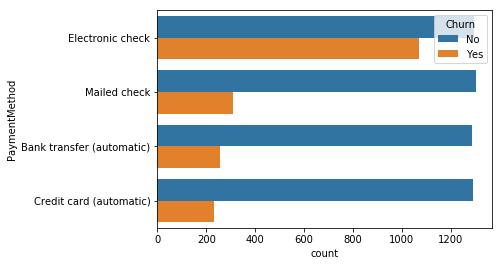

In [34]:
sns.countplot(data=df, y = 'PaymentMethod',hue='Churn');

In [35]:
group = df.groupby('PaymentMethod')
round(group['Churn'].value_counts()/group.size(),2)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.83
                           Yes      0.17
Credit card (automatic)    No       0.85
                           Yes      0.15
Electronic check           No       0.55
                           Yes      0.45
Mailed check               No       0.81
                           Yes      0.19
dtype: float64

`45%` of Customers who choose to pay with **Electronic check** churned, Maybe their is a problem with this service.

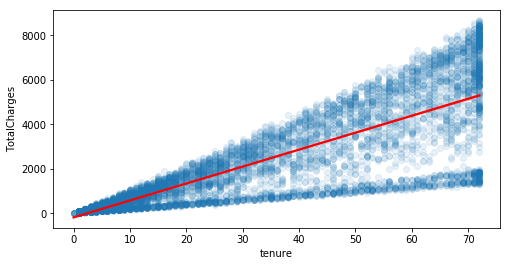

In [36]:
plt.figure(figsize=(8,4))
sns.regplot(data=df,x='tenure',y='TotalCharges'
            ,scatter_kws={'alpha':0.1}
            , line_kws={"color": "red"}
           );

In [37]:
df[['tenure','TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.000000,0.826178
TotalCharges,0.826178,1.000000


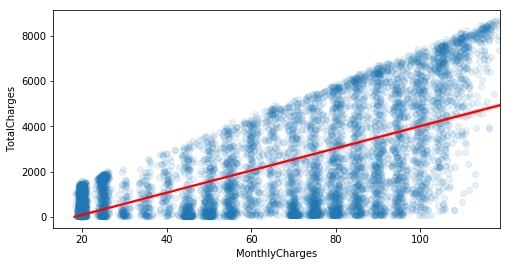

In [38]:
plt.figure(figsize=(8,4))
sns.regplot(data=df,x='MonthlyCharges',y='TotalCharges'
            ,scatter_kws={'alpha':0.1}
            , line_kws={"color": "red"}
           );

In [39]:
df[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651174
TotalCharges,0.651174,1.000000


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The **more Charges** the customer has the `less` he churns.<br>
The **more amount of contract** the `less` the customer churns.<br>
The **more months** the customer with the company the `less` he churns.<br>
Customers with **65 or older** `more` churned than the younger.<br>
Customers who **have partner** is `less` churned than who have not.<br>
customers who have a **phone service** are `more` churned than those who have not.<br>


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Their is a strong positive correlation between tenure and TotalCharges.


## Multivariate Exploration

In [40]:
c = list(df.Contract.unique())
c

['Month-to-month', 'One year', 'Two year']

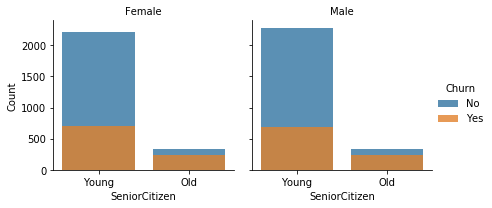

In [41]:
g=sns.FacetGrid(data=df
                , col ='gender'
                ,hue='Churn'
               )
g.map(sns.countplot,'SeniorCitizen',order=['Young','Old'],alpha=0.8);
g.set_titles('{col_name}')
g.set_ylabels('Count')
g.add_legend();

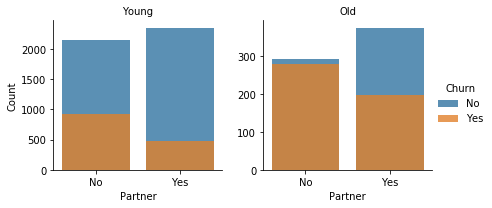

In [42]:
g=sns.FacetGrid(data=df
                , col ='SeniorCitizen'
                ,hue='Churn'
                ,sharey=False)
g.map(sns.countplot,'Partner',order=['No','Yes'],alpha=0.8)
g.set_titles('{col_name}')
g.set_axis_labels("Partner", "Count")
g.add_legend();

In [43]:
group = df.groupby(['SeniorCitizen','Partner'])
np.round(group['Churn'].value_counts()/group.size(),2)

SeniorCitizen  Partner  Churn
Old            No       No       0.51
                        Yes      0.49
               Yes      No       0.65
                        Yes      0.35
Young          No       No       0.70
                        Yes      0.30
               Yes      No       0.83
                        Yes      0.17
dtype: float64

`49%` of Customers who are **65 or older** and have **no partner** `churned`.

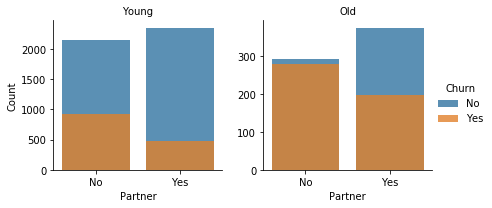

In [44]:
g=sns.FacetGrid(data=df
                , col ='SeniorCitizen'
                ,hue='Churn'
                ,sharey=False)
g.map(sns.countplot,'Partner',order=['No','Yes'],alpha=0.8)
g.set_titles('{col_name}')
g.set_axis_labels("Partner", "Count")
g.add_legend();

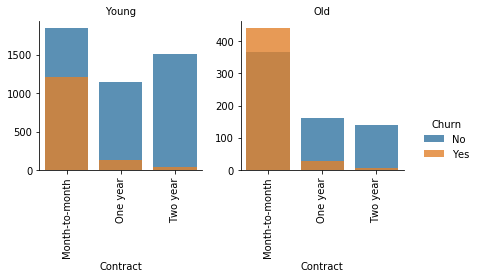

In [45]:
g=sns.FacetGrid(data=df
                , col ='SeniorCitizen'
                , hue='Churn'
                , sharey=False
                , margin_titles=True)
g.map(sns.countplot,'Contract',order=c,alpha=0.8)
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_xticklabels(rotation=90)
g.add_legend();

In [46]:
group = df.groupby(['SeniorCitizen','Contract'])
np.round(group['Churn'].value_counts()/group.size(),2)

SeniorCitizen  Contract        Churn
Old            Month-to-month  Yes      0.55
                               No       0.45
               One year        No       0.85
                               Yes      0.15
               Two year        No       0.96
                               Yes      0.04
Young          Month-to-month  No       0.60
                               Yes      0.40
               One year        No       0.89
                               Yes      0.11
               Two year        No       0.97
                               Yes      0.03
dtype: float64

`55%` of Customers who are **65 or older** and have have a contract of **Month-to-Month** `churned`.<br>
`40%` of Customers who are **less than 65** and have have a contract of **Month-to-Month** `churned`.

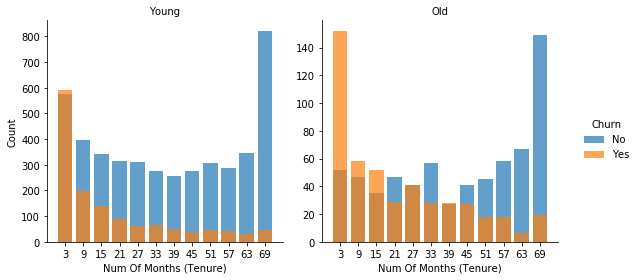

In [47]:
g = sns.FacetGrid(data=df
                  , col='SeniorCitizen'
                  , hue='Churn'
                  , height=4
                  , margin_titles=True
                  , sharey=False
                 )
bin_edges = np.arange(0, df.tenure.max()+6, 6)
g.map(plt.hist,'tenure',bins=bin_edges,rwidth = 0.8,alpha=0.7)
plt.xticks(np.arange(0+3, df.tenure.max(), 6))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Num Of Months (Tenure)", "Count")
g.add_legend();

New Customers **(6 months or less)** tend to `churn`.<br>
In case of **older** Customers, the probability of churn is very large.

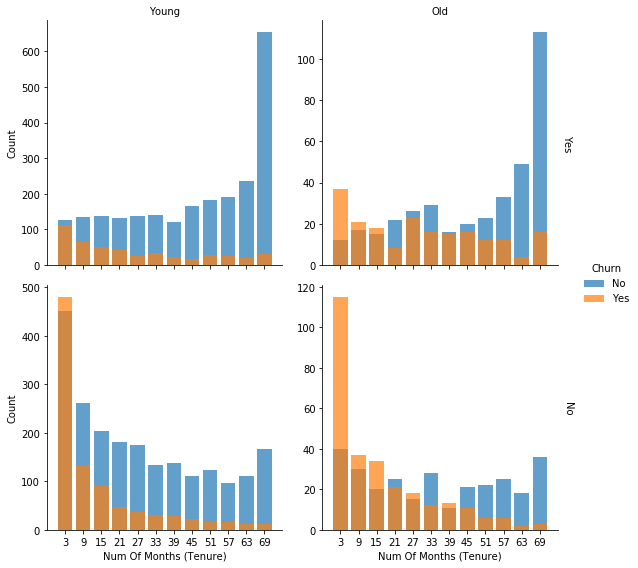

In [48]:
g = sns.FacetGrid(data=df
                  , col='SeniorCitizen'
                  , row ='Partner'
                  , hue='Churn'
                  , height=4
                  , margin_titles=True
                  , sharey=False
                 )
bin_edges = np.arange(0, df.tenure.max()+6, 6)
g.map(plt.hist,'tenure',bins=bin_edges,rwidth = 0.8,alpha=0.7)
plt.xticks(np.arange(0+3, df.tenure.max(), 6))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Num Of Months (Tenure)", "Count")
g.add_legend();

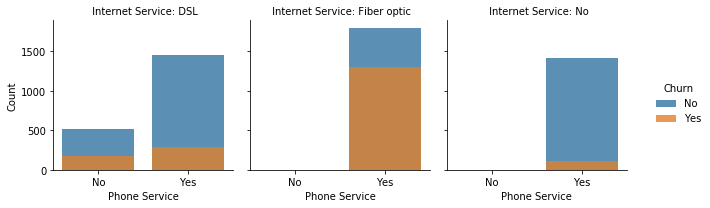

In [49]:
g=sns.FacetGrid(data=df
                ,col ='InternetService'
                ,hue='Churn'
                ,margin_titles=True)
g.map(sns.countplot,'PhoneService',order=['No','Yes'],alpha=0.8)
g.set_axis_labels("Phone Service", "Count")
g.set_titles(col_template=" Internet Service: {col_name}", row_template="{row_name}")
g.add_legend();

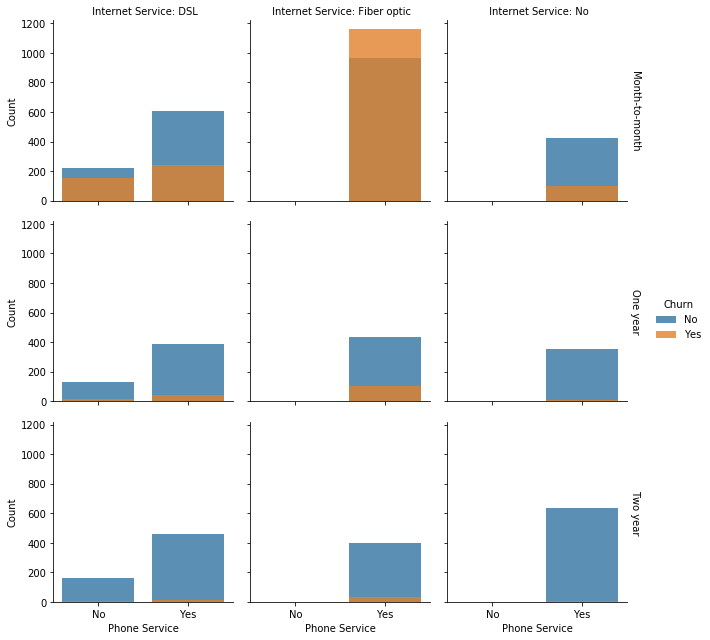

In [50]:
g=sns.FacetGrid(data=df
                ,col ='InternetService'
                ,row = 'Contract'
                ,hue='Churn'
                ,margin_titles=True)
g.map(sns.countplot,'PhoneService',order=['No','Yes'],alpha=0.8)
g.set_axis_labels("Phone Service", "Count")
g.set_titles(col_template=" Internet Service: {col_name}", row_template="{row_name}")
g.add_legend();

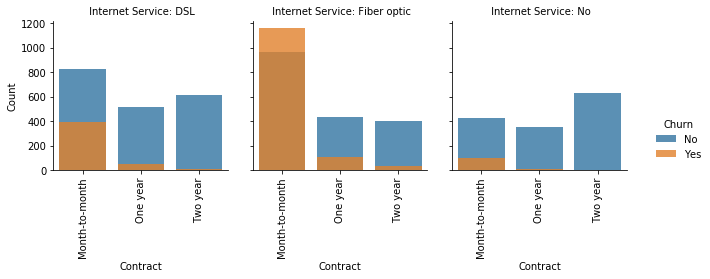

In [51]:
g=sns.FacetGrid(data=df
                ,col ='InternetService'
                #,row='PhoneService'
                ,hue='Churn'
                ,margin_titles=True)
g.map(sns.countplot,'Contract',order=c,alpha=0.8)
g.set_axis_labels("Contract", "Count")
g.set_xticklabels(rotation=90)
g.set_titles(col_template=" Internet Service: {col_name}", row_template="{row_name}")
g.add_legend();

`55%` of Customers Who have **Fiber-optic** as internet service and **M-to-M** as contract `churned`.

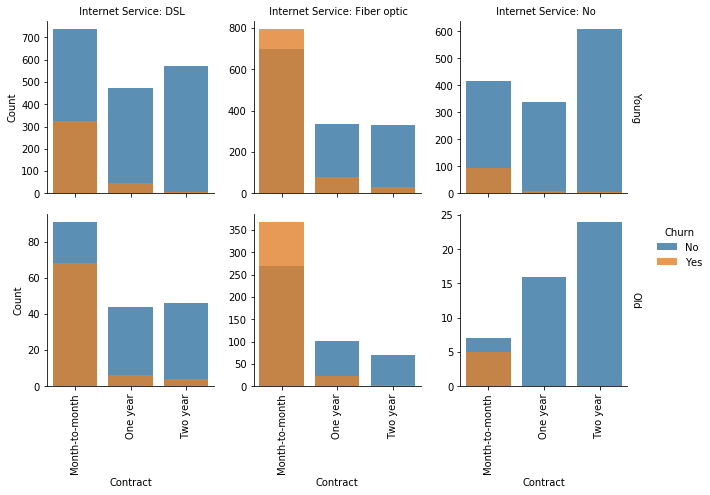

In [52]:
g=sns.FacetGrid(data=df
                ,col ='InternetService'
                ,row='SeniorCitizen'
                ,hue='Churn'
                ,sharey=False
                ,margin_titles=True)
g.map(sns.countplot,'Contract',order=c,alpha=0.8)
g.set_axis_labels("Contract", "Count")
g.set_xticklabels(rotation=90)
g.set_titles(col_template=" Internet Service: {col_name}", row_template="{row_name}")
g.add_legend();

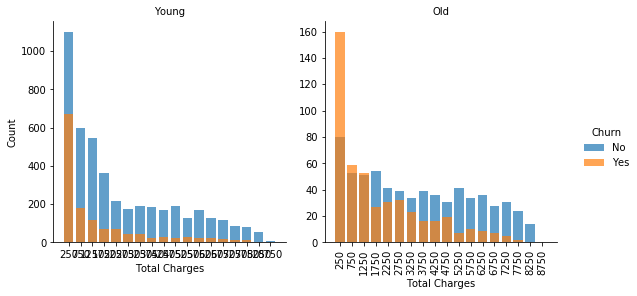

In [53]:
g = sns.FacetGrid(data=df
                  , col ='SeniorCitizen'
                  ,hue='Churn'
                  ,height=4
                  , margin_titles=True
                  ,sharey=False
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

**Older** Customers with **total charges** less than `1500` have a `large` chance to `churn`

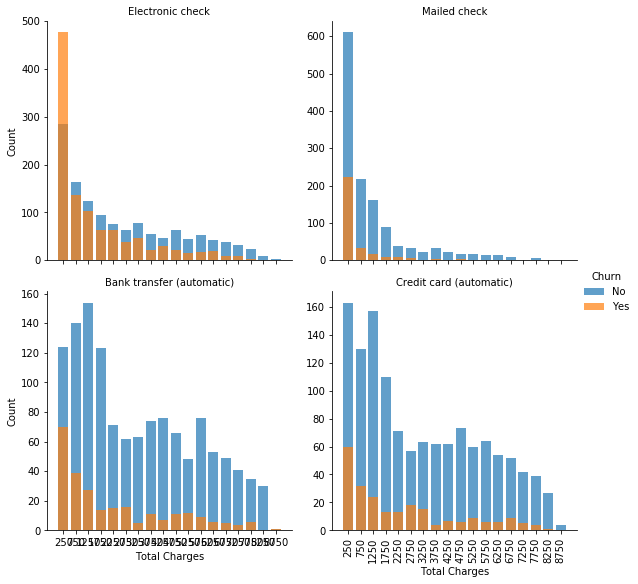

In [54]:
g = sns.FacetGrid(data=df
                  , col ='PaymentMethod'
                  ,hue='Churn'
                  ,height=4
                  , margin_titles=True
                  ,sharey=False
                  ,col_wrap=2
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

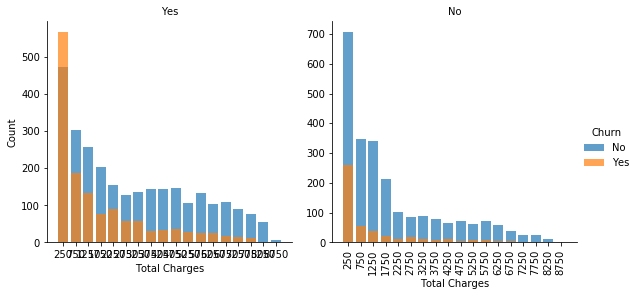

In [55]:
g = sns.FacetGrid(data=df
                  , col ='PaperlessBilling'
                  ,hue='Churn'
                  ,height=4
                  , margin_titles=True
                  ,sharey=False
                  ,col_wrap=2
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

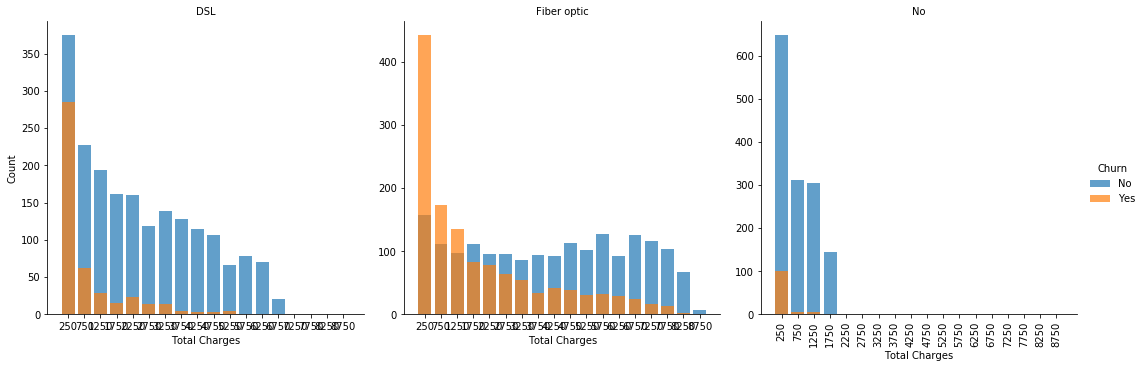

In [56]:
g = sns.FacetGrid(data=df
                  , col ='InternetService'
                  ,hue='Churn'
                  ,height=5
                  , margin_titles=True
                  ,sharey=False
                  ,col_wrap=3
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

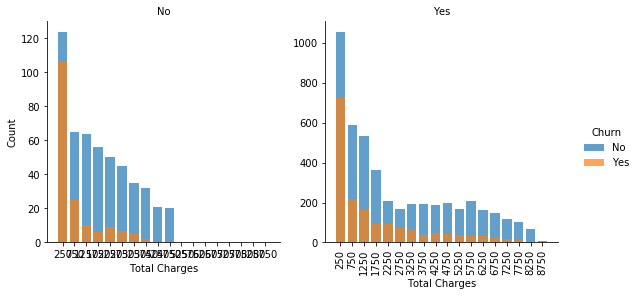

In [57]:
g = sns.FacetGrid(data=df
                  , col ='PhoneService'
                  ,hue='Churn'
                  ,height=4
                  , margin_titles=True
                  ,sharey=False
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

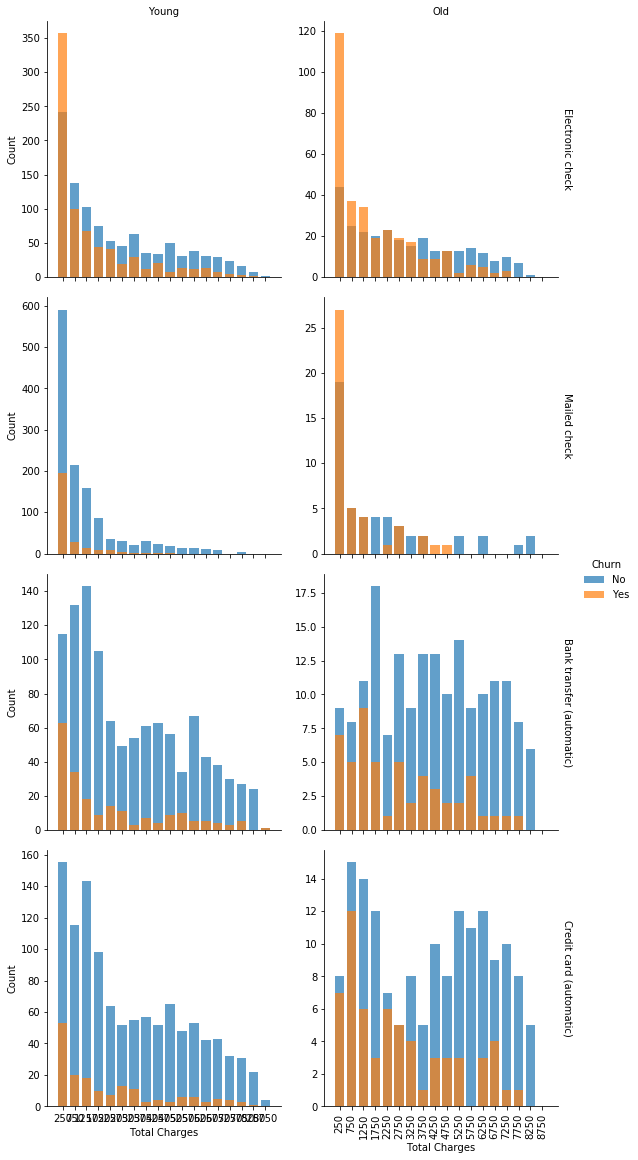

In [58]:
g = sns.FacetGrid(data=df
                  , col ='SeniorCitizen'
                  , row = 'PaymentMethod'
                  ,hue='Churn'
                  , margin_titles=True
                  ,sharey=False
                  ,height=4
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

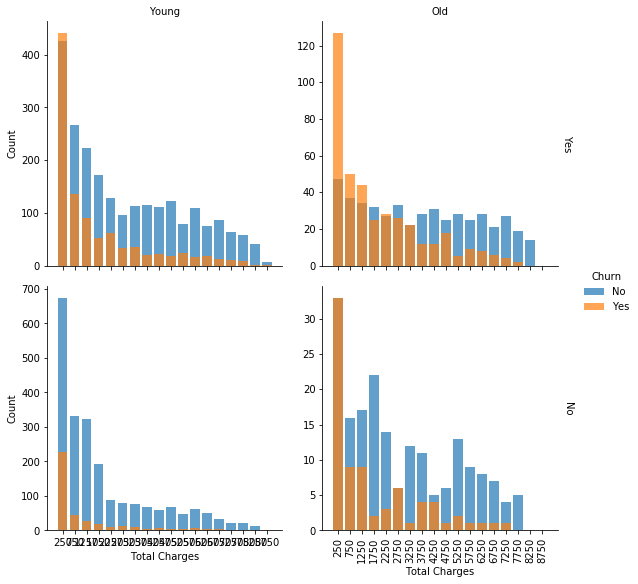

In [59]:
g = sns.FacetGrid(data=df
                  , col ='SeniorCitizen'
                  , row = 'PaperlessBilling'
                  ,hue='Churn'
                  , margin_titles=True
                  ,sharey=False
                  ,height=4
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

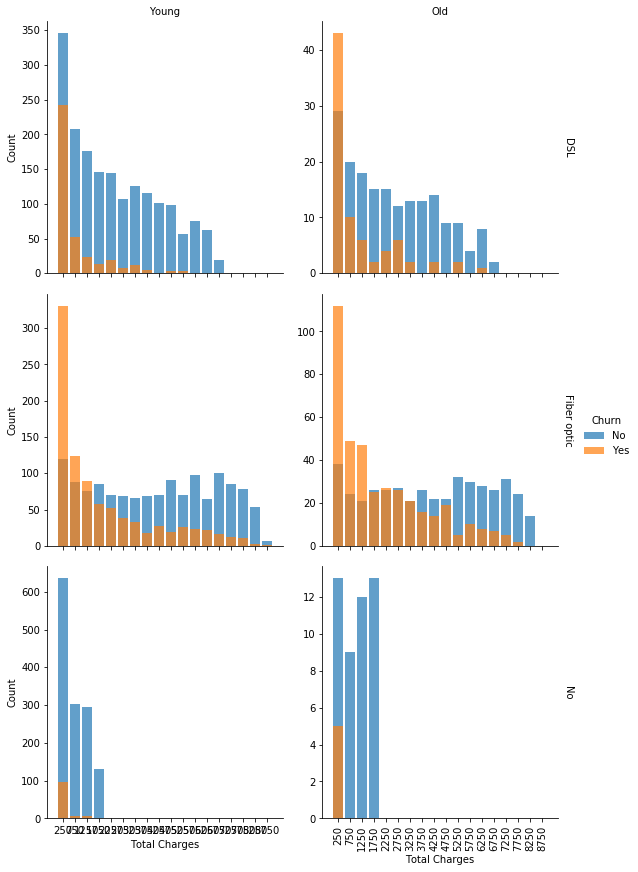

In [60]:
g = sns.FacetGrid(data=df
                  , col ='SeniorCitizen'
                  , row = 'InternetService'
                  ,hue='Churn'
                  , margin_titles=True
                  ,sharey=False
                  ,height=4
                 )
bin_edges = np.arange(0, df.TotalCharges.max()+500, 500)
g.map(plt.hist,'TotalCharges',bins=bin_edges,rwidth = 0.8,alpha=0.7)
g.set(xticks=np.arange(0+250, df.TotalCharges.max()+500, 500))
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Total Charges", "Count")
plt.xticks(rotation=90)
g.add_legend();

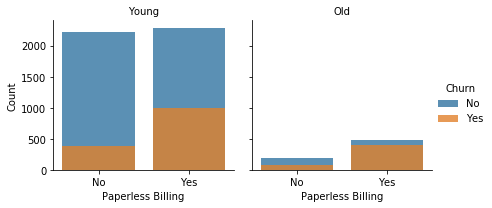

In [61]:
g= sns.FacetGrid(data=df
                 ,col='SeniorCitizen' 
                 ,hue='Churn'
                )
g.map(sns.countplot, 'PaperlessBilling',order=['No','Yes'],alpha=0.8)
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Paperless Billing", "Count")
g.add_legend();

In [62]:
group = df.groupby(['SeniorCitizen','PaperlessBilling'])
round(group['Churn'].value_counts()/group.size(),2)

SeniorCitizen  PaperlessBilling  Churn
Old            No                No       0.71
                                 Yes      0.29
               Yes               No       0.55
                                 Yes      0.45
Young          No                No       0.85
                                 Yes      0.15
               Yes               No       0.70
                                 Yes      0.30
dtype: float64

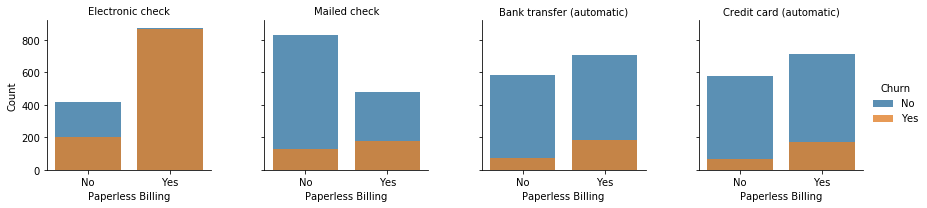

In [63]:
g= sns.FacetGrid(data=df
                 ,col='PaymentMethod' 
                 ,hue='Churn'
                )
g.map(sns.countplot, 'PaperlessBilling',order=['No','Yes'],alpha=0.8)
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Paperless Billing", "Count")
g.add_legend();

In [64]:
group = df.groupby(['PaymentMethod','PaperlessBilling'])
round(group['Churn'].value_counts()/group.size(),2)

PaymentMethod              PaperlessBilling  Churn
Bank transfer (automatic)  No                No       0.89
                                             Yes      0.11
                           Yes               No       0.79
                                             Yes      0.21
Credit card (automatic)    No                No       0.90
                                             Yes      0.10
                           Yes               No       0.81
                                             Yes      0.19
Electronic check           No                No       0.67
                                             Yes      0.33
                           Yes               No       0.50
                                             Yes      0.50
Mailed check               No                No       0.87
                                             Yes      0.13
                           Yes               No       0.73
                                             Yes      0.27
dtype

`50%` of Customers who choose **paperlessBilling** and pay with **Electronic check** churned, Maybe their is a problem with this service.

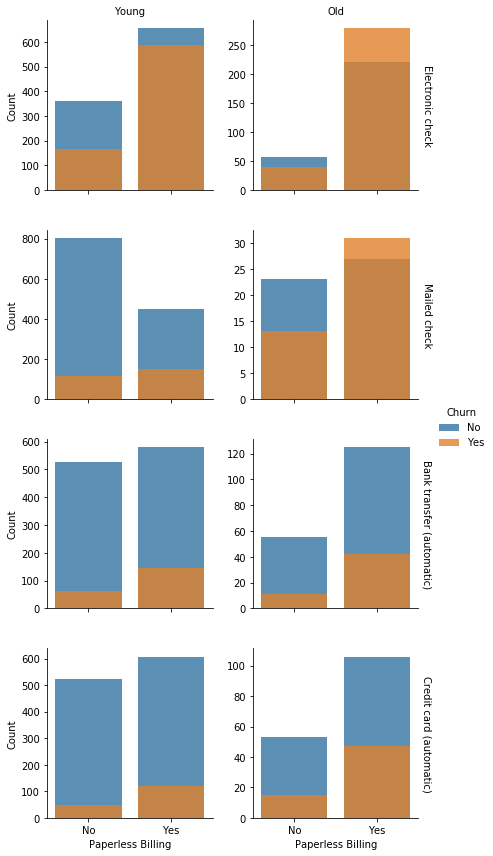

In [65]:
g= sns.FacetGrid(data=df
                 ,col='SeniorCitizen' 
                 ,row='PaymentMethod'
                 ,hue='Churn'
                 , margin_titles=True
                 , sharey=False
                )
g.map(sns.countplot, 'PaperlessBilling',order=['No','Yes'],alpha=0.8)
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set_axis_labels("Paperless Billing", "Count")
g.add_legend();

In [66]:
group = df.groupby(['SeniorCitizen','PaperlessBilling','PaymentMethod'])
round(group['Churn'].value_counts()/group.size(),2)

SeniorCitizen  PaperlessBilling  PaymentMethod              Churn
Old            No                Bank transfer (automatic)  No       0.83
                                                            Yes      0.17
                                 Credit card (automatic)    No       0.78
                                                            Yes      0.22
                                 Electronic check           No       0.59
                                                            Yes      0.41
                                 Mailed check               No       0.64
                                                            Yes      0.36
               Yes               Bank transfer (automatic)  No       0.75
                                                            Yes      0.25
                                 Credit card (automatic)    No       0.69
                                                            Yes      0.31
                                 Electronic ch

It seems `most` **Old people** who choose **Paperless Billing** ,**Electronic check**, or **Mailed check** churn.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> `42%` Customers who are **65 or older** churn,
>> If they have **total charges** less than `1500`,they have a `large` chance to `churn`<br>
>> `49%` of those who also have **no partener**.<br>
>> `45%` of those who also choose **Paperless Billing**.<br>
>>>`53%` of those who also choose **Mailed check** as Payment method<br>
`56%` of those who also choose **Electronic check** as Payment method<br>

> `24%`of Customers who are less than 65 churn
>> `47%` of those who also choose **Paperless Billing** and **Electronic check** as Payment method<br>

> `43%` Customers who have **Month-to-Month** contract churn.<br>
>> `55%` of those who also choose **Fiber-optic** as Internet service churn.<br>
>>>`58%` of those who are **65 or older** churn.

> New Customers **(6 months or less)** tend to `churn`.<br>
>> In case of **older** Customers, the probability of `churn` is very `large`.

### Were there any interesting or surprising interactions between features?

> all the above listed features affect the Churn feature.